In [33]:
import argparse
import multiprocessing as mp
import os
from pathlib import Path

import numpy as np
from torchvision.datasets import CIFAR10
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader, random_split

import matplotlib.pyplot as plt

import pytorch_lightning as pl

# parser = argparse.ArgumentParser()
# parser.add_argument("--savedir", default="exp/imagenet-1k", type=str)
# args = parser.parse_args()

SEED = 1583745484
pl.seed_everything(SEED)

Seed set to 1583745484


1583745484

In [ ]:
def load_one(path):
    # get fixed splits from random_split()
    SEED = 1583745484
    pl.seed_everything(SEED)
    
    """
    This loads a logits and converts it to a scored prediction.
    """
    opredictions = np.load(os.path.join(path, "logits.npy"))  # [n_examples, n_augs, n_classes]
    
    print(f"processing {path}...")
    

    # Be exceptionally careful.
    # Numerically stable everything, as described in the paper.
    predictions = opredictions - np.max(opredictions, axis=-1, keepdims=True)
    predictions = np.array(np.exp(predictions), dtype=np.float64)
    predictions = predictions / np.sum(predictions, axis=-1, keepdims=True)

    labels = get_labels()  # TODO generalize this

    COUNT = predictions.shape[0]
    y_true = predictions[np.arange(COUNT), :, labels[:COUNT]]

    print("mean acc", np.mean(predictions[:, 0, :].argmax(1) == labels[:COUNT]))

    predictions[np.arange(COUNT), :, labels[:COUNT]] = 0
    y_wrong = np.sum(predictions, axis=-1)

    logit = np.log(y_true + 1e-45) - np.log(y_wrong + 1e-45)
    np.save(os.path.join(path, "scores.npy"), logit)


def get_labels():
    DATA_DIR = '/serenity/scratch/psml/repo/psml/data/ILSVRC2012'

    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    imagenet = datasets.ImageNet(root=DATA_DIR, split='val', transform=transform)
    train_ds, test_ds = random_split(imagenet, [0.8, 0.2])
    
    print("train_ds: ", train_ds.indices[:100])
    
    targets_ = [train_ds.dataset.targets[i] for i in train_ds.indices]
    
    return np.array(targets_)


def load_stats():
    with mp.Pool(8) as p:
        p.map(load_one, [os.path.join(args.savedir, path) for path in os.listdir(args.savedir)])


# if __name__ == "__main__":
#     load_stats()


In [7]:
DATA_DIR = '/serenity/scratch/psml/repo/psml/data/ILSVRC2012'

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

imagenet = datasets.ImageNet(root=DATA_DIR, split='val', transform=transform)
train_ds, test_ds = random_split(imagenet, [0.8, 0.2])

print("train_ds: ", train_ds.indices[:100])

targets_ = [train_ds.dataset.targets[i] for i in train_ds.indices]

np.array(targets_)

train_ds:  [18185, 41944, 39282, 35090, 30503, 37898, 49682, 5070, 17288, 14716, 27746, 14457, 45275, 27329, 6398, 24717, 28517, 5449, 44227, 934, 33016, 2112, 7675, 38181, 36293, 33067, 43471, 3154, 44400, 35927, 45604, 32716, 47179, 29338, 25746, 24013, 530, 19828, 31087, 49422, 8789, 37956, 894, 656, 8106, 28795, 17464, 33634, 18551, 37903, 31826, 18537, 13433, 15847, 23692, 20023, 24416, 16293, 26603, 30737, 34462, 1503, 23259, 9152, 4855, 9669, 6359, 5161, 6961, 7239, 13233, 16339, 40159, 31209, 41990, 5144, 38440, 4303, 38968, 49158, 33167, 39765, 39572, 31680, 15996, 34983, 41059, 10597, 41393, 28344, 47303, 42900, 21500, 37800, 10169, 19032, 41641, 36964, 43093, 20237]


array([363, 838, 785, ..., 427, 879, 342])

In [17]:
train_ds.indices

[18185,
 41944,
 39282,
 35090,
 30503,
 37898,
 49682,
 5070,
 17288,
 14716,
 27746,
 14457,
 45275,
 27329,
 6398,
 24717,
 28517,
 5449,
 44227,
 934,
 33016,
 2112,
 7675,
 38181,
 36293,
 33067,
 43471,
 3154,
 44400,
 35927,
 45604,
 32716,
 47179,
 29338,
 25746,
 24013,
 530,
 19828,
 31087,
 49422,
 8789,
 37956,
 894,
 656,
 8106,
 28795,
 17464,
 33634,
 18551,
 37903,
 31826,
 18537,
 13433,
 15847,
 23692,
 20023,
 24416,
 16293,
 26603,
 30737,
 34462,
 1503,
 23259,
 9152,
 4855,
 9669,
 6359,
 5161,
 6961,
 7239,
 13233,
 16339,
 40159,
 31209,
 41990,
 5144,
 38440,
 4303,
 38968,
 49158,
 33167,
 39765,
 39572,
 31680,
 15996,
 34983,
 41059,
 10597,
 41393,
 28344,
 47303,
 42900,
 21500,
 37800,
 10169,
 19032,
 41641,
 36964,
 43093,
 20237,
 10650,
 14587,
 21213,
 45863,
 21055,
 11134,
 17720,
 17719,
 38714,
 5046,
 12791,
 28140,
 23650,
 44807,
 35795,
 8530,
 17323,
 42868,
 47551,
 19430,
 36445,
 40787,
 10889,
 25439,
 42769,
 23180,
 40997,
 21306,
 311

In [27]:
len(train_ds.dataset.targets)

50000

In [28]:
imagenet

Dataset ImageNet
    Number of datapoints: 50000
    Root location: /serenity/scratch/psml/repo/psml/data/ILSVRC2012
    Split: val
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [39]:
data_loader_n = DataLoader(imagenet, batch_size=10, shuffle=False)

def imshow(img):
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean  # Unnormalize
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.axis('off')

def display_images(images, labels):
    plt.figure(figsize=(15, 15))
    for i in range(10):
        plt.subplot(2, 5, i + 1)  # Arrange in 2 rows and 5 columns
        imshow(images[i])
        plt.title(f'Label: {labels[i].item()}')  # Display label as title
    plt.show()

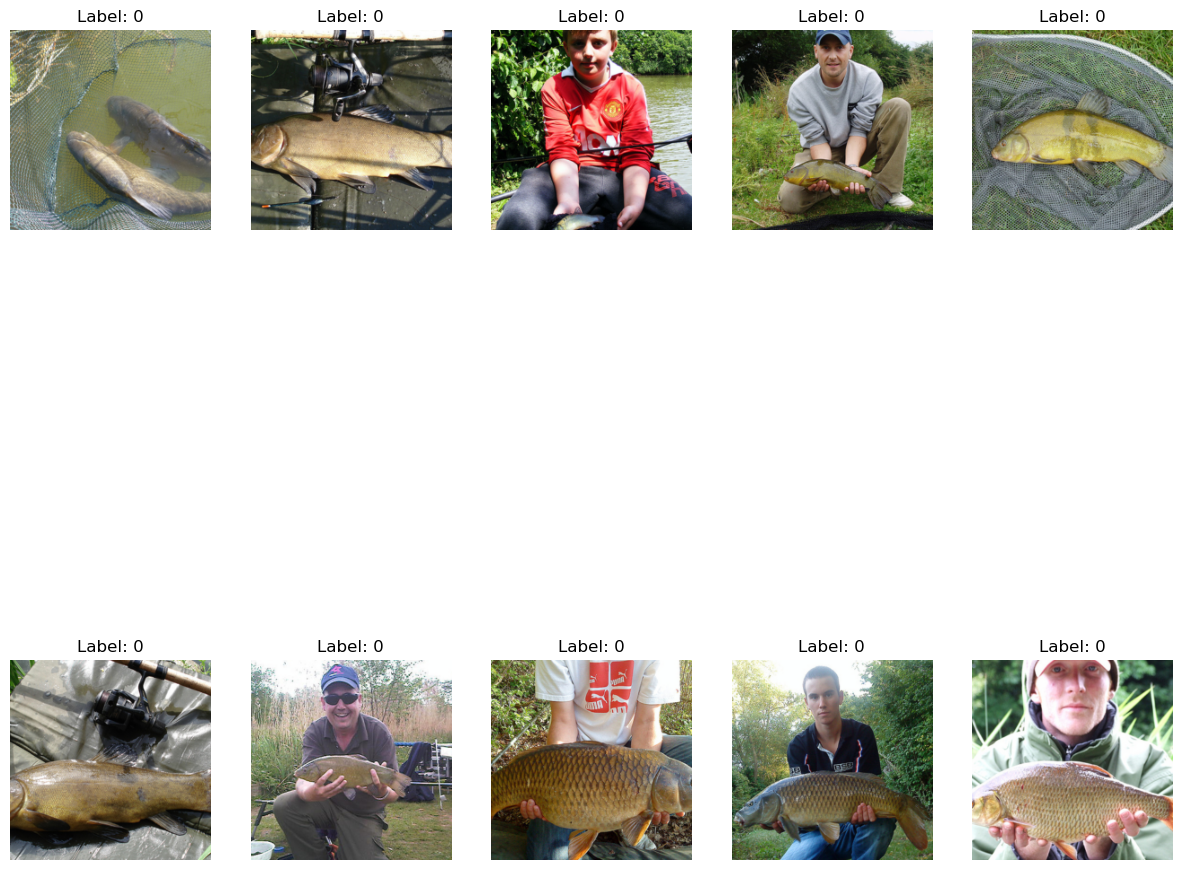

In [41]:
data_iter = iter(data_loader_n)

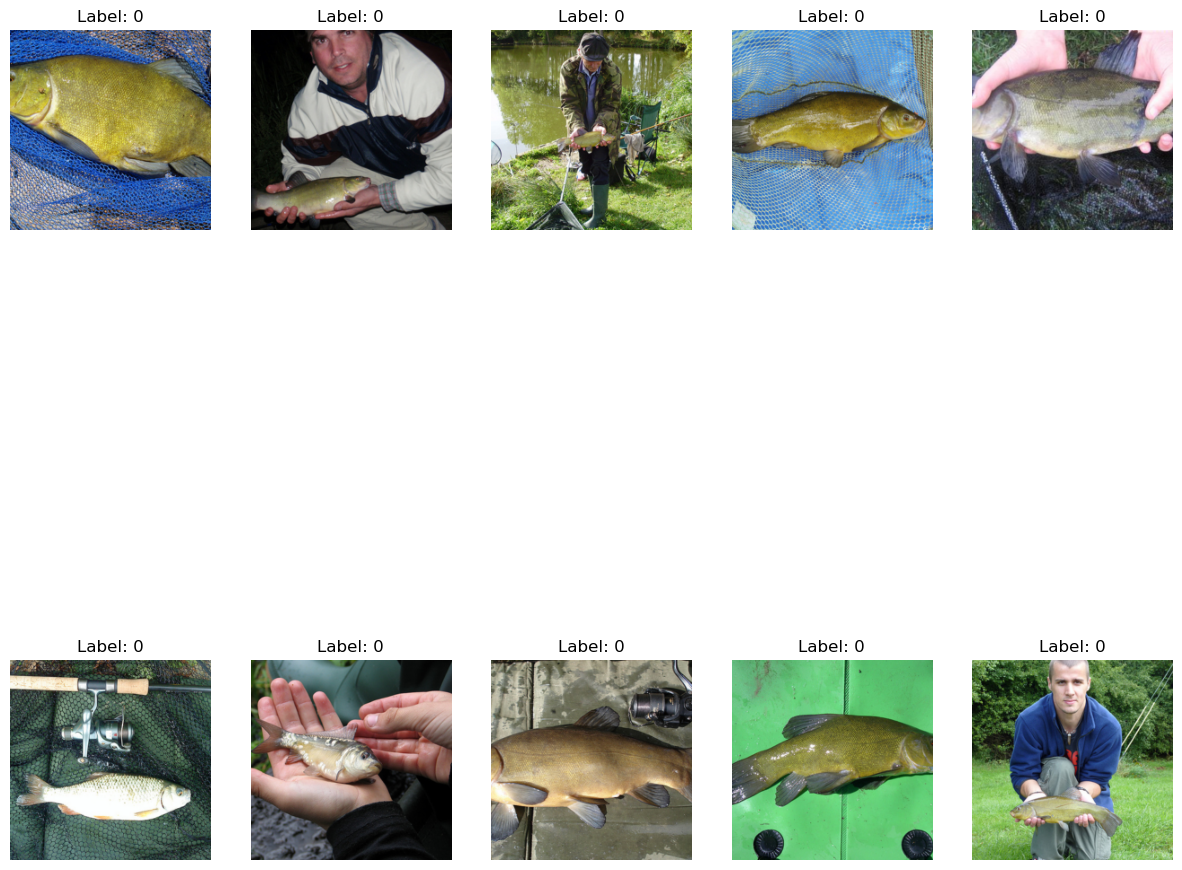

In [44]:
images, labels = next(data_iter)
display_images(images, labels)